# Abstract coverage in OpenAlex by year


In [5]:
# Import everything that is required
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Set up parameters for querying OpenAlex. Two calls are being done per publication year; one for the counts of abstracts, one for the total counts of pubs in OpenAlex. 

The counts are written in a dataframe "metadata_df" with the following rows: Year, total, has_abstract, percentage_has_abstract.

In [35]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the base URL for the API (has_abstract)
base_url_has_abstract = "https://api.openalex.org/works?filter=has_abstract:true,publication_year:"

# Define the base URL for the API (total count)
base_url_total = "https://api.openalex.org/works?filter=publication_year:"

# List of years to iterate through
years = list(range(2001, 2024))

# List to store the retrieved metadata counts
metadata_counts = []

# Iterate through the list of years
for year in years:
    # Create the API URL for has_abstract with the variable
    api_url_has_abstract = base_url_has_abstract + str(year)

    # Make the API request for has_abstract
    response_has_abstract = requests.get(api_url_has_abstract)

    # Check if the response is successful (status code 200)
    if response_has_abstract.status_code == 200:
        data_has_abstract = response_has_abstract.json()

        # Get the count of works with has_abstract:true from the response
        count_has_abstract = data_has_abstract["meta"]["count"]

    # Create the API URL for total count with the variable
    api_url_total = base_url_total + str(year)

    # Make the API request for total count
    response_total = requests.get(api_url_total)

    # Check if the response is successful (status code 200)
    if response_total.status_code == 200:
        data_total = response_total.json()

        # Get the total count of works from the response
        count_total = data_total["meta"]["count"]

    # Append the information for the year to the list
    metadata_counts.append({"Year": year, "total": count_total, "has_abstract": count_has_abstract})

# Create a DataFrame from the metadata counts
metadata_df = pd.DataFrame(metadata_counts)

# Calculate the percentage of works with has_abstract:true as a fraction of the total for each year
metadata_df['percentage_has_abstract'] = (metadata_df['has_abstract'] / metadata_df['total']) * 100

Print the dataframe for validatoin.

In [37]:
print(metadata_df)

    Year     total  has_abstract  percentage_has_abstract
0   2001   3644618       1801477                49.428417
1   2002   4228137       2272270                53.741636
2   2003   4521282       2337604                51.702238
3   2004   4867427       2608673                53.594497
4   2005   5221136       2847798                54.543647
5   2006   5706900       3164867                55.456850
6   2007   6254562       3431711                54.867327
7   2008   6614389       3723142                56.288525
8   2009   7158114       4099363                57.268758
9   2010   7657088       4428497                57.835263
10  2011   8303163       4756905                57.290276
11  2012   8556091       4997894                58.413287
12  2013   9074672       5220100                57.523842
13  2014   9442386       5316731                56.307071
14  2015   9595421       5346223                55.716398
15  2016   9833236       5191319                52.793597
16  2017   969

## Plotting
Set up a new bar chart plot to visualize the percentages of publications in OpenAlex with inverted abstracts per year. Total counts are on top of the bar. 

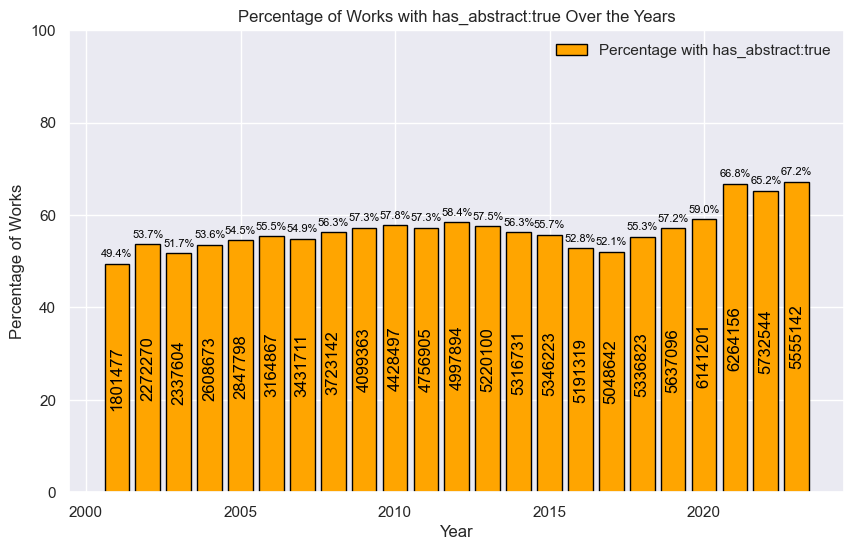

In [43]:
# Set the style of the plot using seaborn
sns.set(style='darkgrid')

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
bars = ax.bar(metadata_df['Year'], metadata_df['percentage_has_abstract'], color='orange', edgecolor='black', label='Percentage with has_abstract:true')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Works')
ax.set_title('Percentage of Works with has_abstract:true Over the Years')
ax.legend()

# Set y-axis limit to 100%
ax.set_ylim(0, 100)

# Add the counts of has_abstract written vertically on the bars
for i, val in enumerate(metadata_df['has_abstract']):
    ax.text(metadata_df['Year'][i], metadata_df['percentage_has_abstract'][i] / 2, str(val), ha='center', va='center', rotation=90, color='black')

# Add percentages with one number after the comma above the bars
for bar in bars:
    yval = bar.get_height()
    percentage_val = f"{yval:.1f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, percentage_val, ha='center', va='bottom', color='black', fontsize=8)

# Show the plot
plt.show()
